In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib as plt


In [2]:
#loading data
tr_data = pd.read_csv("data/project2_transformed_training_data.csv")
val_data = pd.read_csv("data/project2_transformed_validation_data.csv")
te_data = pd.read_csv("data/project2_transformed_test_data.csv")


In [3]:
# splitting data into labels and values
tr_labels = tr_data.iloc[:,0]
tr_data = tr_data.iloc[:,1:]

val_labels = val_data.iloc[:,0]
val_data = val_data.iloc[:,1:]

te_data = te_data.iloc[:,1:]

In [4]:
# creating model with choosen parameters
model = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.25 ,max_depth=-1 , num_leaves=2500, random_state=412 ,n_estimators = 55, reg_alpha= 500)


In [5]:
# training
model.fit(tr_data, tr_labels, verbose=1, eval_set=[(tr_data,tr_labels),(val_data,val_labels)], eval_metric='mae')

C:\Users\cezar\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's l1: 1.99649	training's l2: 10.138	valid_1's l1: 2.00196	valid_1's l2: 10.2661
[2]	training's l1: 1.79642	training's l2: 8.33527	valid_1's l1: 1.80584	valid_1's l2: 8.51201
[3]	training's l1: 1.67419	training's l2: 7.16503	valid_1's l1: 1.68767	valid_1's l2: 7.3901
[4]	training's l1: 1.58715	training's l2: 6.36969	valid_1's l1: 1.60356	valid_1's l2: 6.64537
[5]	training's l1: 1.52218	training's l2: 5.84315	valid_1's l1: 1.54244	valid_1's l2: 6.1633
[6]	training's l1: 1.47392	training's l2: 5.44229	valid_1's l1: 1.4962	valid_1's l2: 5.76386
[7]	training's l1: 1.43864	training's l2: 5.13037	valid_1's l1: 1.46254	valid_1's l2: 5.471
[8]	training's l1: 1.41663	training's l2: 4.89931	valid_1's l1: 1.44287	valid_1's l2: 5.26893
[9]	training's l1: 1.39923	training's l2: 4.72698	valid_1's l1: 1.4277	valid_1's l2: 5.11712
[10]	training's l1: 1.38523	training's l2: 4.58685	valid_1's l1: 1.41554	valid_1's l2: 4.98715
[11]	training's l1: 1.37242	training's l2: 4.44052	valid_1's l1: 1

LGBMRegressor(learning_rate=0.25, n_estimators=55, num_leaves=2500,
              random_state=412, reg_alpha=500)

C:\Users\cezar\anaconda3\lib\site-packages\lightgbm\plotting.py:372: UserWarning: More than one metric available, picking one to plot.
  _log_warning("More than one metric available, picking one to plot.")


<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

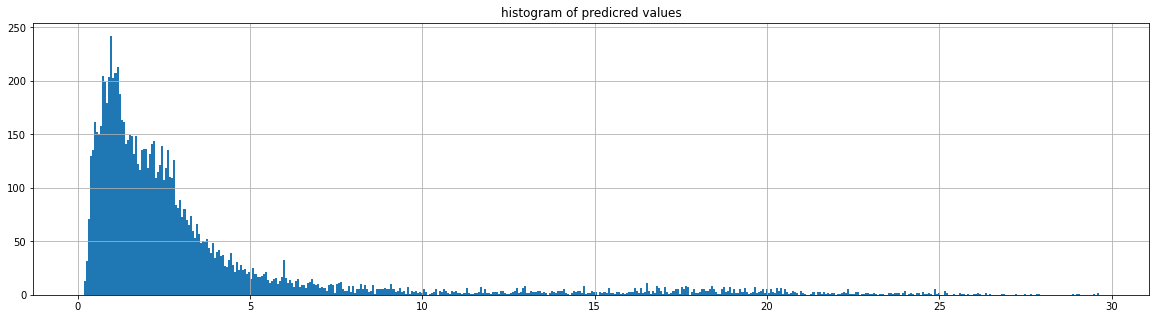

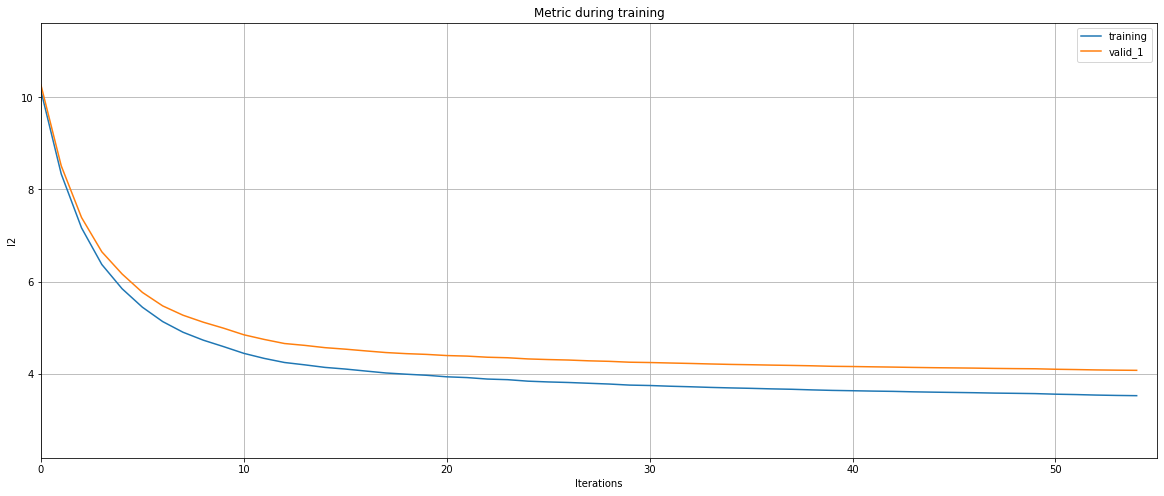

In [6]:

predict = model.predict(te_data)
pd.DataFrame(predict).hist(bins=500, figsize= (20,5))
plt.pyplot.title("histogram of predicred values")
lgb.plot_metric(model,figsize= (20,8))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

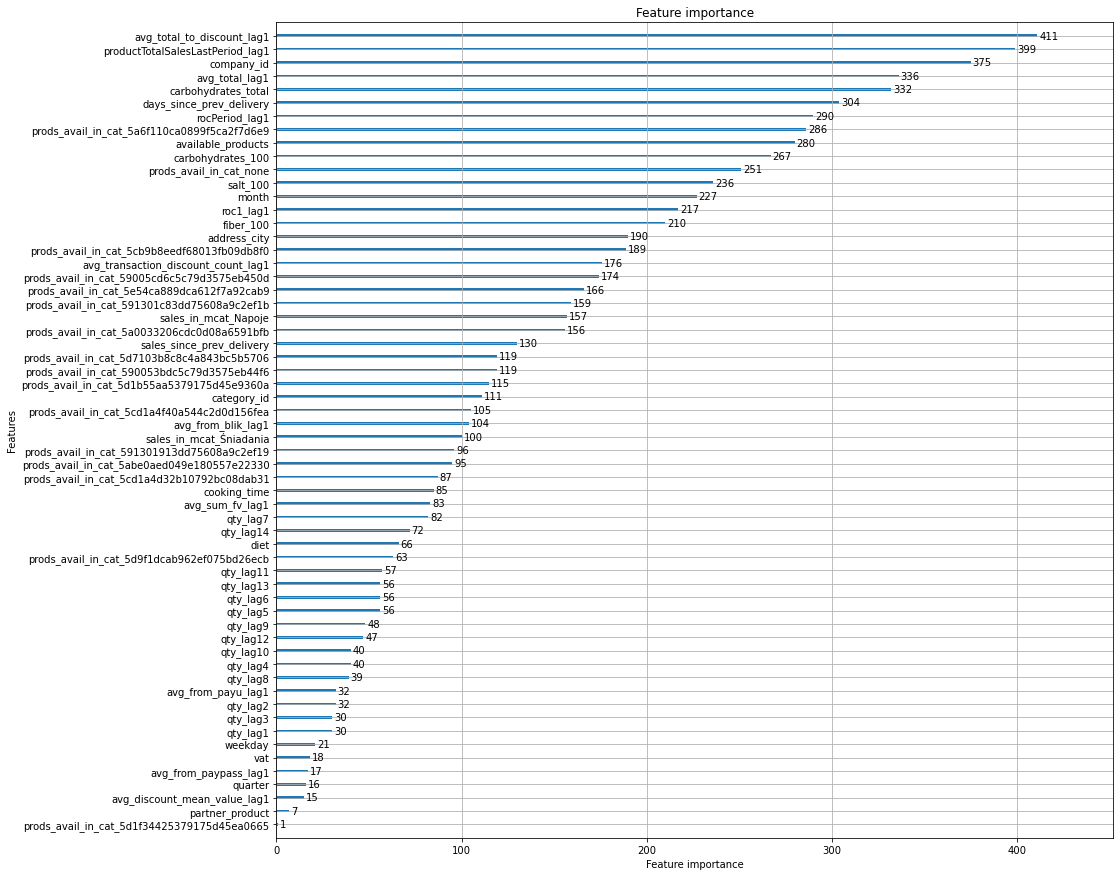

In [7]:
lgb.plot_importance(model, figsize=(15,15))

Checking what columns has very low feature importance

In [8]:
importace_to_cut = 10
tr_data  = tr_data.iloc[:, model.feature_importances_ > importace_to_cut]
val_data = val_data.iloc[:, model.feature_importances_ > importace_to_cut]
te_data  = te_data.iloc[:, model.feature_importances_ > importace_to_cut]

Traning model on data with deleted columns of low importance

In [ ]:
model2 = lgb.LGBMRegressor(boosting_type='gbdt', learning_rate=0.25 ,max_depth=-1 , num_leaves=1500, random_state=1232 ,n_estimators = 20, reg_alpha= 500)
model2.fit(tr_data, tr_labels, verbose=1, eval_set=[(tr_data,tr_labels),(val_data,val_labels)], eval_metric='mae')

[1]	training's l1: 1.99649	training's l2: 10.138	valid_1's l1: 2.00196	valid_1's l2: 10.2661
[2]	training's l1: 1.79642	training's l2: 8.33527	valid_1's l1: 1.80584	valid_1's l2: 8.51201
[3]	training's l1: 1.67419	training's l2: 7.16503	valid_1's l1: 1.68767	valid_1's l2: 7.3901
[4]	training's l1: 1.58715	training's l2: 6.36969	valid_1's l1: 1.60356	valid_1's l2: 6.64537
[5]	training's l1: 1.52218	training's l2: 5.84315	valid_1's l1: 1.54244	valid_1's l2: 6.1633
[6]	training's l1: 1.47392	training's l2: 5.44229	valid_1's l1: 1.49621	valid_1's l2: 5.76388
[7]	training's l1: 1.43864	training's l2: 5.13037	valid_1's l1: 1.46256	valid_1's l2: 5.47101
[8]	training's l1: 1.41664	training's l2: 4.89931	valid_1's l1: 1.44288	valid_1's l2: 5.26894
[9]	training's l1: 1.39924	training's l2: 4.72699	valid_1's l1: 1.42771	valid_1's l2: 5.11713
[10]	training's l1: 1.38523	training's l2: 4.58685	valid_1's l1: 1.41555	valid_1's l2: 4.98716
[11]	training's l1: 1.37242	training's l2: 4.44053	valid_1's l

LGBMRegressor(learning_rate=0.25, n_estimators=20, num_leaves=1500,
              random_state=1232, reg_alpha=500)

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='l2'>

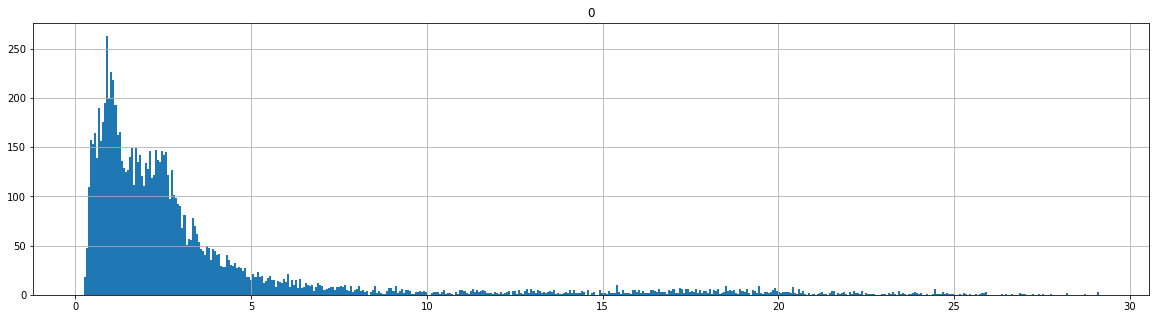

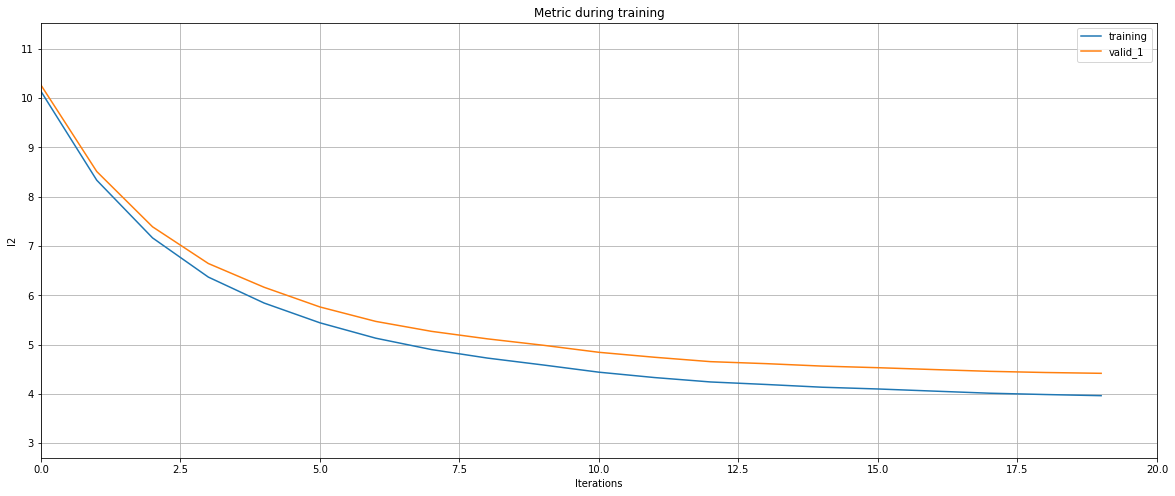

In [ ]:
predict2 = model2.predict(te_data)

pd.DataFrame(predict2).hist(bins=500, figsize= (20,5))
lgb.plot_metric(model2,figsize= (20,8))

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

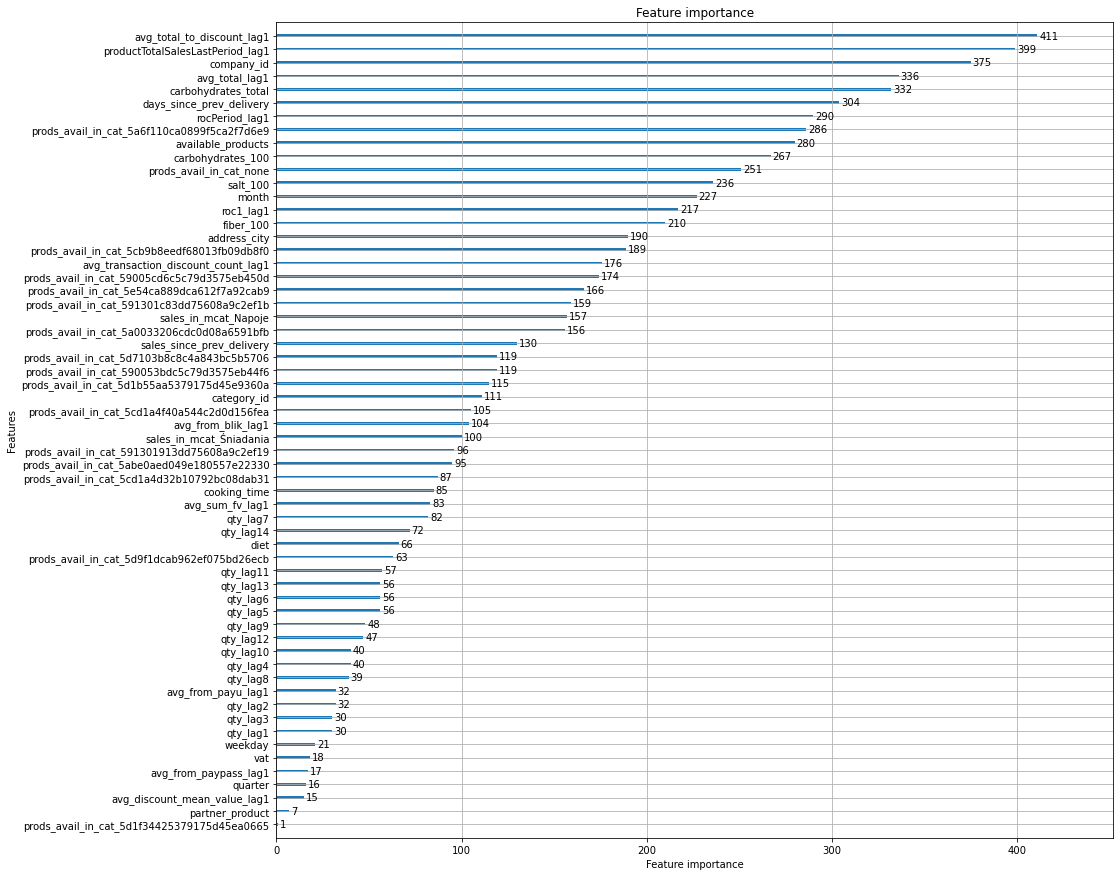

In [ ]:
lgb.plot_importance(model, figsize=(15,15))

In [ ]:
np.savetxt("predict.txt", predict2, fmt='%.2f')